## Jae's XGboost with Jae's datase

[0]	validation_0-rmsle:2.67244	validation_1-rmsle:2.63131
[1]	validation_0-rmsle:2.58972	validation_1-rmsle:2.55242
[2]	validation_0-rmsle:2.51476	validation_1-rmsle:2.48068
[3]	validation_0-rmsle:2.44617	validation_1-rmsle:2.41482
[4]	validation_0-rmsle:2.38290	validation_1-rmsle:2.35392
[5]	validation_0-rmsle:2.32417	validation_1-rmsle:2.29724
[6]	validation_0-rmsle:2.26934	validation_1-rmsle:2.24423
[7]	validation_0-rmsle:2.21793	validation_1-rmsle:2.19443
[8]	validation_0-rmsle:2.16954	validation_1-rmsle:2.14747
[9]	validation_0-rmsle:2.12382	validation_1-rmsle:2.10304
[10]	validation_0-rmsle:2.08050	validation_1-rmsle:2.06088
[11]	validation_0-rmsle:2.03934	validation_1-rmsle:2.02078
[12]	validation_0-rmsle:2.00014	validation_1-rmsle:1.98255


/var/folders/0s/f75_jykn50116v0hgg1z7_rw0000gn/T/ipykernel_20883/3476435051.py:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 0] = label_encoder.fit_transform(dataset.iloc[:, 0])
/var/folders/0s/f75_jykn50116v0hgg1z7_rw0000gn/T/ipykernel_20883/3476435051.py:33: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 1:] = dataset.iloc[:, 1:].astype(float)
/Users/nick/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with s

[13]	validation_0-rmsle:1.96270	validation_1-rmsle:1.94579
[14]	validation_0-rmsle:1.92692	validation_1-rmsle:1.91082
[15]	validation_0-rmsle:1.89254	validation_1-rmsle:1.87749
[16]	validation_0-rmsle:1.85963	validation_1-rmsle:1.84507
[17]	validation_0-rmsle:1.82802	validation_1-rmsle:1.81411
[18]	validation_0-rmsle:1.79758	validation_1-rmsle:1.78438
[19]	validation_0-rmsle:1.76825	validation_1-rmsle:1.75544
[20]	validation_0-rmsle:1.73985	validation_1-rmsle:1.72755
[21]	validation_0-rmsle:1.71243	validation_1-rmsle:1.70052
[22]	validation_0-rmsle:1.68602	validation_1-rmsle:1.67468
[23]	validation_0-rmsle:1.66047	validation_1-rmsle:1.64957
[24]	validation_0-rmsle:1.63562	validation_1-rmsle:1.62513
[25]	validation_0-rmsle:1.61161	validation_1-rmsle:1.60138
[26]	validation_0-rmsle:1.58835	validation_1-rmsle:1.57856
[27]	validation_0-rmsle:1.56565	validation_1-rmsle:1.55616
[28]	validation_0-rmsle:1.54361	validation_1-rmsle:1.53452
[29]	validation_0-rmsle:1.52227	validation_1-rmsle:1.513

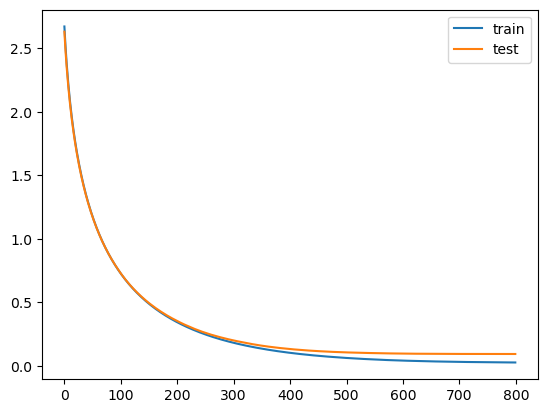

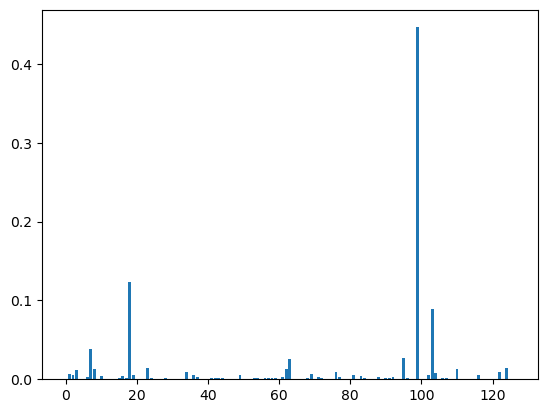

statistical analysis on the real oil price 
count    373.000000
mean      23.840607
std       11.406177
min        6.903893
25%       14.601227
50%       20.330962
75%       32.198447
max       61.564496
Name: 127, dtype: float64


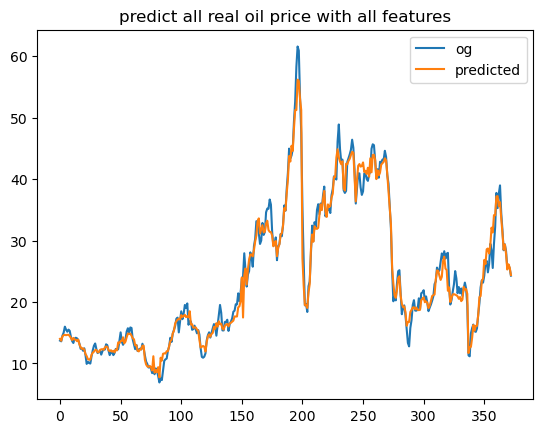

root mean square percentage error is : 7.5724803079683625
percent accuracy is : 92.42751969203164


In [4]:
from sklearn.calibration import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd 
import math
import numpy as np
from collections  import defaultdict
from sklearn.ensemble import RandomForestRegressor



#reading jae's dataset
normalized_table = pd.read_csv("post_cleaned_datasets/macro_features_and_real_oil_prices_log_tranferred_dropped_Nan_skipped_neg_and_zeros_for_log.csv")

#define dataset
dataset = normalized_table.iloc[1:]

#removing index num in table (idk it was added)
dataset = dataset.iloc[: , 1:]

#instantiate labelencoder
label_encoder = LabelEncoder()


#cant have strings so its converted to a category
dataset.iloc[:, 0] = label_encoder.fit_transform(dataset.iloc[:, 0])
#converted data to a float
dataset.iloc[:, 1:] = dataset.iloc[:, 1:].astype(float)


#getting all but last column, last column is the real oil price
X = dataset.iloc[:, :-1]
#getting last column (real oil price)
y = dataset.iloc[:, -1 ]


#get half of X ( in terms of columns)

#get half of y ( in terms of rows)


#split data to X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .5 )
# so it uses one year for train and another year for test 


regressor = xgb.XGBRegressor()


#set up seach grid
#param_grid = { "n_estimators": [500, 600, 700],
#                "max_depth": [4,5,6],
#                "learning_rate": [0.01,0.015]}

#try every combo of the values above
#search = GridSearchCV(regressor,param_grid, cv = 5).fit(X,y)

#print("the best hyperparameters are ", search.best_params_)
#'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700

regressor= xgb.XGBRegressor(n_estimators = 800,
                            max_depth    = 4,
                            learning_rate = 0.006,
                            )

evalset = [(X_train,y_train), (X_test,y_test)]

regressor.fit(X_train,y_train, eval_metric = 'rmsle',eval_set = evalset)
yhat = regressor.predict(X_test)

"""
print('actual prices')
print(y_test)
print('predicted: ')
print(yhat)
"""




# evaluate predictions
from sklearn.metrics import mean_squared_log_error
rmse = np.sqrt(mean_squared_log_error(y_test, yhat))
print("mean squared error: %.5f" % rmse)



# retrieve performance metrics
results = regressor.evals_result()
#plot learning curve
pyplot.plot(results['validation_0']['rmsle'],label = 'train')
pyplot.plot(results['validation_1']['rmsle'], label = 'test')
#show legend
pyplot.legend()
#show the plot
pyplot.show()

"""
# graphing original vs predicted 
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label = "original")
plt.plot(x_ax, yhat , label  = "predicted")
plt.title("real oil prices vs predicted real oil prices")
plt.legend()
plt.show()
"""


#get importance
importance = regressor.feature_importances_

#for i , v in enumerate(importance):
    #print('feature: %0d, score: %.5f' % (i,v))

#plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()


#statistical analysis on the real oil price
print("statistical analysis on the real oil price \n" + str(y.describe()))

#inputting all data to predict all real oil prices w the pretrained model
predict_w_pretrained_model = regressor.predict(X)
x_axis = range(len(y))
pyplot.plot(x_axis, y, label = "og")
pyplot.plot(x_axis, predict_w_pretrained_model, label = "predicted")
pyplot.title("predict all real oil price with all features")
pyplot.legend()
pyplot.show()

rmspe = np.sqrt(np.mean(np.square(((y-predict_w_pretrained_model)/ y)), axis = 0 ))
print("root mean square percentage error is : " + str(rmspe*100))
print("percent accuracy is : "+ str(100-(rmspe*100)))






In [12]:
import matplotlib.pyplot as plt
#reading maria's dataset
normalized_table = pd.read_csv("post_cleaned_datasets/maria_dataset.csv")

normalized_table.head()
"""

#define dataset
dataset = normalized_table.iloc[1:]


#instantiate labelencoder
label_encoder = LabelEncoder()


#cant have strings so its converted to a category
dataset.iloc[:, 0] = label_encoder.fit_transform(dataset.iloc[:, 0])
#converted data to a float
dataset.iloc[:, 1:] = dataset.iloc[:, 1:].astype(float)


#getting all but last column, last column is the real oil price
X = dataset.iloc[:, :-1]
#getting last column (real oil price)
y = dataset.iloc[:, -1 ]


#get half of X ( in terms of columns)

#get half of y ( in terms of rows)


#split data to X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .5 )
# so it uses one year for train and another year for test 


regressor = xgb.XGBRegressor()


#set up seach grid
#param_grid = { "n_estimators": [500, 600, 700],
#                "max_depth": [4,5,6],
#                "learning_rate": [0.01,0.015]}

#try every combo of the values above
#search = GridSearchCV(regressor,param_grid, cv = 5).fit(X,y)

#print("the best hyperparameters are ", search.best_params_)
#'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700

regressor= xgb.XGBRegressor(n_estimators = 800,
                            max_depth    = 4,
                            learning_rate = 0.006,
                            )

evalset = [(X_train,y_train), (X_test,y_test)]

regressor.fit(X_train,y_train, eval_metric = 'rmsle',eval_set = evalset)
yhat = regressor.predict(X_test)



# evaluate predictions
from sklearn.metrics import mean_squared_log_error
rmse = np.sqrt(mean_squared_log_error(y_test, yhat))
print("mean squared error: %.5f" % rmse)



# retrieve performance metrics
results = regressor.evals_result()
#plot learning curve
pyplot.plot(results['validation_0']['rmsle'],label = 'train')
pyplot.plot(results['validation_1']['rmsle'], label = 'test')
#show legend
pyplot.legend()
#show the plot
pyplot.show()

#tis was commented out %%%%
# graphing original vs predicted 
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label = "original")
plt.plot(x_ax, yhat , label  = "predicted")
plt.title("real oil prices vs predicted real oil prices")
plt.legend()
plt.show()


#get importance
importance = regressor.feature_importances_

#for i , v in enumerate(importance):
    #print('feature: %0d, score: %.5f' % (i,v))

#plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()


#statistical analysis on the real oil price
print("statistical analysis on the real oil price \n" + str(y.describe()))

#inputting all data to predict all real oil prices w the pretrained model
predict_w_pretrained_model = regressor.predict(X)
x_axis = range(len(y))
pyplot.plot(x_axis, y, label = "og")
pyplot.plot(x_axis, predict_w_pretrained_model, label = "predicted")
pyplot.title("predict all real oil price with all features")
pyplot.legend()
pyplot.show()

rmspe = np.sqrt(np.mean(np.square(((y-predict_w_pretrained_model)/ y)), axis = 0 ))
print("root mean square percentage error is : " + str(rmspe*100))
print("percent accuracy is : "+ str(100-(rmspe*100)))



"""

'\n\n#define dataset\ndataset = normalized_table.iloc[1:]\n\n\n#instantiate labelencoder\nlabel_encoder = LabelEncoder()\n\n\n#cant have strings so its converted to a category\ndataset.iloc[:, 0] = label_encoder.fit_transform(dataset.iloc[:, 0])\n#converted data to a float\ndataset.iloc[:, 1:] = dataset.iloc[:, 1:].astype(float)\n\n\n#getting all but last column, last column is the real oil price\nX = dataset.iloc[:, :-1]\n#getting last column (real oil price)\ny = dataset.iloc[:, -1 ]\n\n\n#get half of X ( in terms of columns)\n\n#get half of y ( in terms of rows)\n\n\n#split data to X and y\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .5 )\n# so it uses one year for train and another year for test \n\n\nregressor = xgb.XGBRegressor()\n\n\n#set up seach grid\n#param_grid = { "n_estimators": [500, 600, 700],\n#                "max_depth": [4,5,6],\n#                "learning_rate": [0.01,0.015]}\n\n#try every combo of the values above\n#search = GridSearchCV(regr

[0]	validation_0-rmsle:1.05625	validation_1-rmsle:1.03899


[1]	validation_0-rmsle:0.62224	validation_1-rmsle:0.61645
[2]	validation_0-rmsle:0.39850	validation_1-rmsle:0.40064
[3]	validation_0-rmsle:0.26823	validation_1-rmsle:0.27787
[4]	validation_0-rmsle:0.18684	validation_1-rmsle:0.20237
[5]	validation_0-rmsle:0.13250	validation_1-rmsle:0.15442
[6]	validation_0-rmsle:0.09517	validation_1-rmsle:0.12390
[7]	validation_0-rmsle:0.06955	validation_1-rmsle:0.10725
[8]	validation_0-rmsle:0.05169	validation_1-rmsle:0.09718
[9]	validation_0-rmsle:0.03906	validation_1-rmsle:0.09320
[10]	validation_0-rmsle:0.03010	validation_1-rmsle:0.09153
[11]	validation_0-rmsle:0.02340	validation_1-rmsle:0.08963
[12]	validation_0-rmsle:0.01837	validation_1-rmsle:0.08908
[13]	validation_0-rmsle:0.01479	validation_1-rmsle:0.08898
[14]	validation_0-rmsle:0.01207	validation_1-rmsle:0.08887
[15]	validation_0-rmsle:0.00989	validation_1-rmsle:0.08873
[16]	validation_0-rmsle:0.00806	validation_1-rmsle:0.08855
[17]	validation_0-rmsle:0.00676	validation_1-rmsle:0.08856
[18]	v

/Users/nick/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmsle:0.00179	validation_1-rmsle:0.08883
[28]	validation_0-rmsle:0.00160	validation_1-rmsle:0.08885
[29]	validation_0-rmsle:0.00141	validation_1-rmsle:0.08887
[30]	validation_0-rmsle:0.00127	validation_1-rmsle:0.08893
[31]	validation_0-rmsle:0.00110	validation_1-rmsle:0.08891
[32]	validation_0-rmsle:0.00105	validation_1-rmsle:0.08892
[33]	validation_0-rmsle:0.00097	validation_1-rmsle:0.08892
[34]	validation_0-rmsle:0.00084	validation_1-rmsle:0.08893
[35]	validation_0-rmsle:0.00073	validation_1-rmsle:0.08897
[36]	validation_0-rmsle:0.00064	validation_1-rmsle:0.08898
[37]	validation_0-rmsle:0.00057	validation_1-rmsle:0.08898
[38]	validation_0-rmsle:0.00053	validation_1-rmsle:0.08900
[39]	validation_0-rmsle:0.00045	validation_1-rmsle:0.08899
[40]	validation_0-rmsle:0.00041	validation_1-rmsle:0.08900
[41]	validation_0-rmsle:0.00036	validation_1-rmsle:0.08901
[42]	validation_0-rmsle:0.00034	validation_1-rmsle:0.08902
[43]	validation_0-rmsle:0.00031	validation_1-rmsle:0.089

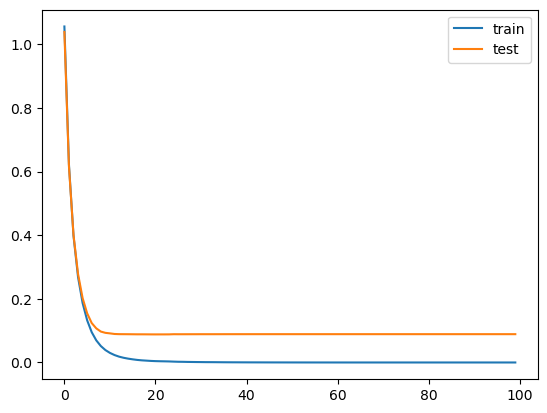

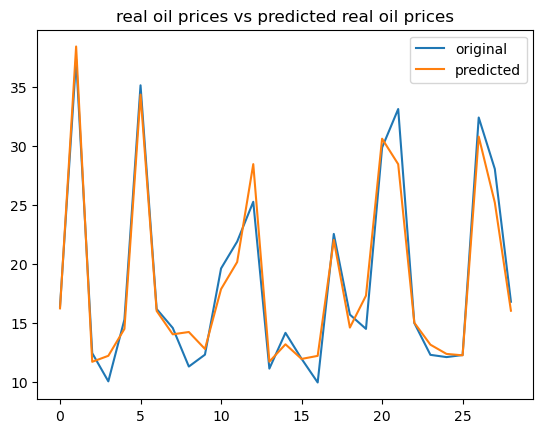

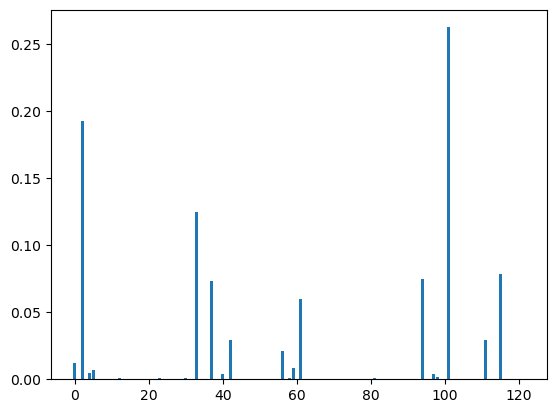

statistical analysis on the real oil price 
count    142.000000
mean      19.656510
std        8.125533
min        9.924812
25%       13.372291
50%       16.041518
75%       24.881182
max       38.771314
Name: Real Oil Prices, dtype: float64


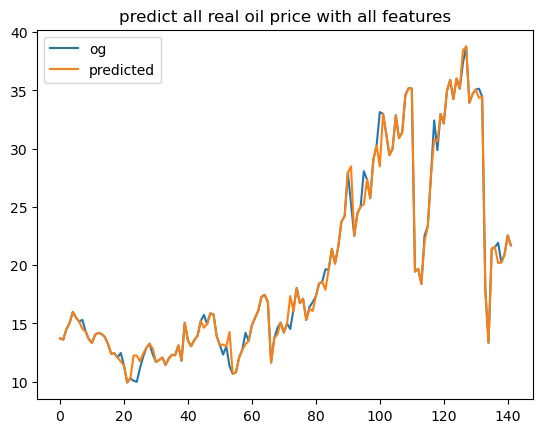

root mean square percentage error is : 4.563418224983274
percent accuracy is : 95.43658177501672


In [40]:
import matplotlib.pyplot as plt

#reading maria's dataset
normalized_table = pd.read_csv("post_cleaned_datasets/maria_dataset.csv")

#define dataset contains marcoeconomic data and real oil prices
dataset = normalized_table.iloc[:, :-2]

#converted data to a float
dataset = dataset.astype(float)


#getting all but last column, last column is the real oil price
X = dataset.iloc[:, :-1]
#getting last column (real oil price)
y = dataset.iloc[:, -1 ]



#split data to X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2 )

regressor = xgb.XGBRegressor()


#set up seach grid
#param_grid = { "n_estimators": [500, 600, 700],
#                "max_depth": [4,5,6],
#                "learning_rate": [0.01,0.015]}

#try every combo of the values above
#search = GridSearchCV(regressor,param_grid, cv = 5).fit(X,y)

#print("the best hyperparameters are ", search.best_params_)
#'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700

"""
regressor= xgb.XGBRegressor(n_estimators = 800,
                            max_depth    = 4,
                            learning_rate = 0.006,
                            )
"""

regressor= xgb.XGBRegressor(n_estimators = 100,
                            seed = 42, objective= 'reg:squarederror' 
                            )

evalset = [(X_train,y_train), (X_test,y_test)]
regressor.fit(X_train,y_train, eval_metric = 'rmsle',eval_set = evalset)

yhat = regressor.predict(X_test)



# evaluate predictions
from sklearn.metrics import mean_squared_error
mse = (mean_squared_error(y_test, yhat))
print("mean squared error: %.5f" % mse)



# retrieve performance metrics
results = regressor.evals_result()
#plot learning curve
pyplot.plot(results['validation_0']['rmsle'],label = 'train')
pyplot.plot(results['validation_1']['rmsle'], label = 'test')
#show legend
pyplot.legend()
#show the plot
pyplot.show()

#tis was commented out %%%%
# graphing original vs predicted 
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label = "original")
plt.plot(x_ax, yhat , label  = "predicted")
plt.title("real oil prices vs predicted real oil prices")
plt.legend()
plt.show()


#get importance
importance = regressor.feature_importances_

#for i , v in enumerate(importance):
    #print('feature: %0d, score: %.5f' % (i,v))

#plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()


#statistical analysis on the real oil price
print("statistical analysis on the real oil price \n" + str(y.describe()))

#inputting all data to predict all real oil prices w the pretrained model
predict_w_pretrained_model = regressor.predict(X)
x_axis = range(len(y))
pyplot.plot(x_axis, y, label = "og")
pyplot.plot(x_axis, predict_w_pretrained_model, label = "predicted")
pyplot.title("predict all real oil price with all features")
pyplot.legend()
pyplot.show()

rmspe = np.sqrt(np.mean(np.square(((y-predict_w_pretrained_model)/ y)), axis = 0 ))
print("root mean square percentage error is : " + str(rmspe*100))
print("percent accuracy is : "+ str(100-(rmspe*100)))




